In [1]:
import numpy as np
import scipy.sparse.linalg
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
import e_tps
import a_mps

In [3]:
e_tps.example_run_ising_honeycomb()

Parameters:  {'N_boundary': 10, 'N_imaginary': 300, 'chi_mps': 20, 'chi_tps': 2, 'g': 1.0, 'J': 1.0}
imaginary time evolution
--> delta = 0.1
--> delta = 0.01
--> delta = 0.001
evaluating expectation values


array([-1.66909168])

In [4]:
chi_tps, chi_mps_max = 3, 20
N_imaginary = 100
N_boundary=50
g = 4.5
print("g=", g)
model = e_tps.TFIModelHoneycomb(1, g)
sx, sz, s0 = model.sigmax, model.sigmaz, model.id
Mx = np.reshape(np.kron(sx, s0) + np.kron(s0, sx), (2, 2, 2, 2)) / 3. # divide by 3: per bond
Mz = np.reshape(np.kron(sz, s0) + np.kron(s0, sz), (2, 2, 2, 2)) / 3
Mxx = np.reshape(np.kron(sx, sx) + np.kron(sx, sx), (2, 2, 2, 2)) / 3.

psi_tps = e_tps.run_simplified_update(model, chi_tps, N_imaginary)
for chi_mps in np.arange(5, chi_mps_max, 5):
    exp_vals = e_tps.evaluate_exp_vals(psi_tps, [model.H_bonds, [Mx]*3, [Mz]*3], chi_mps, N_boundary)
    print("--> chi_mps = ", chi_mps, ": ", exp_vals)

g= 4.5
imaginary time evolution
--> delta = 0.1
--> delta = 0.01
--> delta = 0.001
--> chi_mps =  5 :  [-4.58419652e+00  8.11890563e-17  9.80848525e-01]
--> chi_mps =  10 :  [-4.58419652e+00  8.09920768e-17  9.80848527e-01]
--> chi_mps =  15 :  [-4.58419652e+00  8.14235859e-17  9.80848527e-01]


In [5]:
# for convenience: define a function for it...
def run_sim(g, chi_tps, chi_mps_max):
    print("g=", g)
    model = e_tps.TFIModelHoneycomb(1., g)
    sx, sz, s0 = model.sigmax, model.sigmaz, model.id
    Mx = np.reshape(np.kron(sx, s0) + np.kron(s0, sx), (2, 2, 2, 2)) / 3. # divide by 3: per bond
    Mz = np.reshape(np.kron(sz, s0) + np.kron(s0, sz), (2, 2, 2, 2)) / 3
    Mxx = np.reshape(np.kron(sx, sx) + np.kron(sx, sx), (2, 2, 2, 2)) / 3.

    psi_tps = e_tps.run_simplified_update(model, chi_tps, N_imaginary)
    for chi_mps in np.arange(5, chi_mps_max+1, 5):
        exp_vals = e_tps.evaluate_exp_vals(psi_tps, [model.H_bonds, [Mx]*3, [Mz]*3, [Mxx]*3], chi_mps, N_boundary)
        print("--> chi_mps = ", chi_mps, ": ", exp_vals) # print: allows to check convergence
    return exp_vals  # returns the results for the largest chi_mps which we have calculated -> most accurate

In [6]:
g = 2.1 # check for a g at/close to the critical point: hardest region

chi_tps_vals = [2, 3, 4, 5]
results = []
for chi_tps in chi_tps_vals:
    print("chi_tps = ", chi_tps)
    vals = run_sim(g, chi_tps, 25)
    results.append(vals)
results = np.array(results)

chi_tps =  2
g= 2.1
imaginary time evolution
--> delta = 0.1
--> delta = 0.01
--> delta = 0.001
--> chi_mps =  5 :  [-2.29255765e+00 -3.92823729e-13  8.91658628e-01  2.80049690e-01]
--> chi_mps =  10 :  [-2.29255765e+00 -3.92843637e-13  8.91658626e-01  2.80049693e-01]
--> chi_mps =  15 :  [-2.29255765e+00 -3.92839175e-13  8.91658626e-01  2.80049693e-01]
--> chi_mps =  20 :  [-2.29255765e+00 -3.92836104e-13  8.91658626e-01  2.80049693e-01]
--> chi_mps =  25 :  [-2.29255765e+00 -3.92837397e-13  8.91658626e-01  2.80049693e-01]
chi_tps =  3
g= 2.1
imaginary time evolution
--> delta = 0.1
--> delta = 0.01
--> delta = 0.001
--> chi_mps =  5 :  [-2.29392404e+00  6.58129907e-13  8.82372165e-01  2.93961665e-01]
--> chi_mps =  10 :  [-2.29393084e+00  6.57732513e-13  8.82348465e-01  2.93999377e-01]
--> chi_mps =  15 :  [-2.29393096e+00  6.57675804e-13  8.82348449e-01  2.93999476e-01]
--> chi_mps =  20 :  [-2.29393096e+00  6.57725488e-13  8.82348449e-01  2.93999477e-01]
--> chi_mps =  25 :  [-2.29

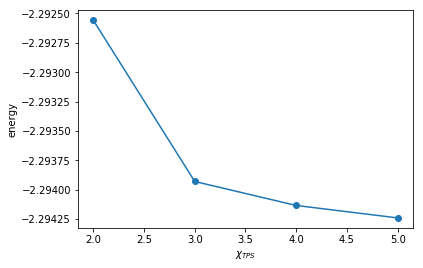

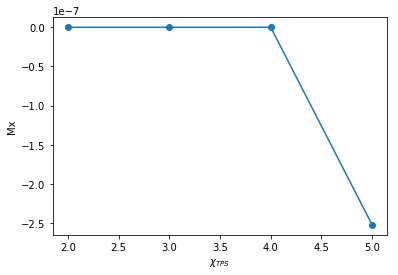

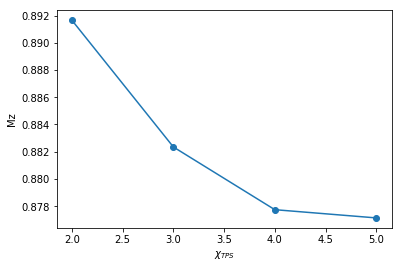

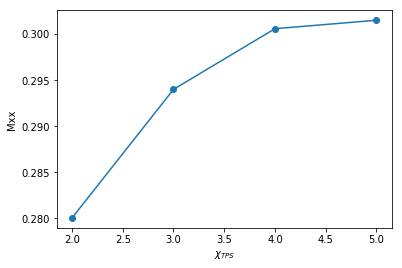

In [7]:
for i, label in enumerate(['energy', 'Mx', 'Mz', 'Mxx']):
    plt.figure()
    plt.plot(chi_tps_vals, results[:, i], marker='o')
    plt.xlabel(r"$\chi_{TPS}$")
    plt.ylabel(label)
plt.show()

In [8]:
gs = np.linspace(1.8, 2.2, 11)
results_g_chi = []
chi_mps_max = 15
chi_tps_vals = [2, 3, 4]
for g in gs:
    res_chi = []
    for chi_tps in chi_tps_vals:
        res = run_sim(g, chi_tps, chi_mps_max)
        res_chi.append(res)
    results_g_chi.append(res_chi)
results_g_chi = np.array(results_g_chi)

g= 1.8
imaginary time evolution
--> delta = 0.1
--> delta = 0.01
--> delta = 0.001
--> chi_mps =  5 :  [-2.04216528  0.16837058  0.81070048  0.38860294]
--> chi_mps =  10 :  [-2.04216558  0.16836984  0.8107003   0.38860336]
--> chi_mps =  15 :  [-2.04216558  0.16836984  0.8107003   0.38860336]
g= 1.8
imaginary time evolution
--> delta = 0.1
--> delta = 0.01
--> delta = 0.001
--> chi_mps =  5 :  [-2.06899511 -0.70977079  0.67159131  0.5734205 ]
--> chi_mps =  10 :  [-2.06899512 -0.70977078  0.67159131  0.5734205 ]
--> chi_mps =  15 :  [-2.06899512 -0.70977078  0.67159131  0.5734205 ]
g= 1.8
imaginary time evolution
--> delta = 0.1
--> delta = 0.01
--> delta = 0.001
--> chi_mps =  5 :  [-2.06899584  0.70957888  0.67169513  0.57329641]
--> chi_mps =  10 :  [-2.06899597  0.70957881  0.67169517  0.57329644]
--> chi_mps =  15 :  [-2.06899597  0.70957881  0.67169517  0.57329644]
g= 1.84
imaginary time evolution
--> delta = 0.1
--> delta = 0.01
--> delta = 0.001
--> chi_mps =  5 :  [-2.0717129

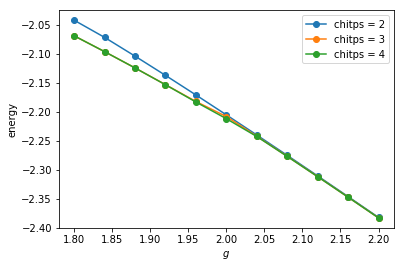

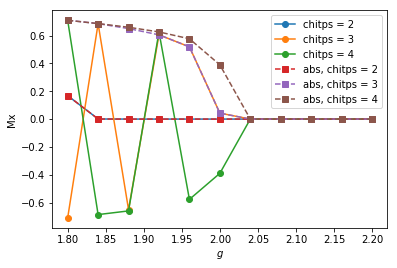

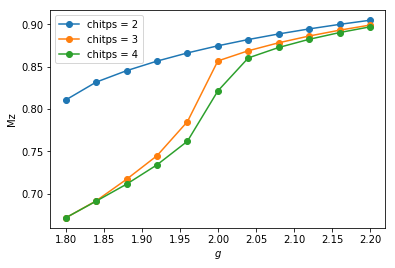

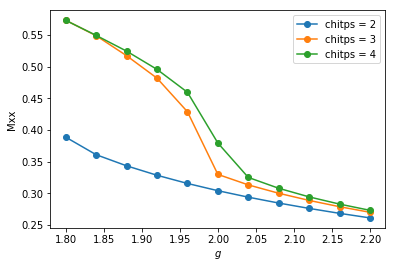

In [9]:
for i, label in enumerate(['energy', 'Mx', 'Mz', 'Mxx']):
    plt.figure(i+1)
    for j in range(len(chi_tps_vals)):
        plt.plot(gs, results_g_chi[:, j, i], marker='o',
                label="chitps = {chi:d}".format(chi=chi_tps_vals[j]))
    plt.xlabel("$g$")
    plt.ylabel(label)
    plt.legend(loc='best')
# update second plot: add abs(Mx)
plt.figure(2)
for j in range(len(chi_tps_vals)):
    plt.plot(gs, np.abs(results_g_chi[:, j, 1]), marker='s', linestyle='--', 
            label="abs, chitps = {chi:d}".format(chi=chi_tps_vals[j]))
plt.legend(loc='best')
plt.show()


# Bonus exercise
Here, we use the boundary MPS to calculate the partition function of the *classical* Ising model in 2D, $H = J \sum_{<i,j> } s_i s_j$.
We define the tensor $Z^0_{s0, s1, s2, s3} = \exp(-\beta J(s_0s_1 + s_2s_3 + s_0s_2 + s_1 s_3))$, with the legs aligned as
```
    s2     s3
    |      |
    --------
    |  Z0  |
    --------
    |      |
    s0     s1
```
The partition function $Z = \sum_{{s}} exp(-\beta J\sum_{<i,j> s_i s_j})$ corresponds then directly to a contraction 
the $Z^0$ tensors in a checker-board pattern:
```
     |      |      |      |
     --------      --------
     |  Z0  |      |  Z0  |      ...
     --------      --------
     |      |      |      |      |
            --------      --------
   ...      |  Z0  |      |  Z0  |
            --------      --------
     |      |      |      |      |
     --------      --------
     |  Z0  |      |  Z0  |      ...
     --------      --------
     |      |      |      |

```
(The original spins $s_i$ live on the bonds connecting the tensors, forming a dual square lattice rotated by 45 degrees.)

To evaluate the expectation value of a local (4-site) operator, we can multiply a single $Z^0$ of them with a the operator to be measured, which leaves us exactly with the same structure as for the contraction of the PEPS.


In [10]:
def get_Z_2D_ising(beta_J):
    si = np.array([1., -1.])
    s0 = si[:, np.newaxis, np.newaxis, np.newaxis]
    s1 = si[np.newaxis, :, np.newaxis, np.newaxis] 
    s2 = si[np.newaxis, np.newaxis, :, np.newaxis]
    s3 = si[np.newaxis, np.newaxis, np.newaxis, :] 
    Z0 = np.exp(-beta_J * (s0*s1 + s2*s3 + s0*s2 + s1*s3))  # shape (2,2,2,2)
    ZM = Z0.copy()
    ZM = ZM[:, :, :, :] * (s0*s1*s2*s3)
    ZE = Z0.copy()
    ZE = ZE[:, :, :, :] * (s0*s1 + s2*s3 + s0*s2 + s1*s3)
    return Z0, ZM, ZE

def run_2D_Ising(beta_J, chi_mps, N_boundary):
    Z0, ZM, ZE = get_Z_2D_ising(beta_J)
    mps_top = a_mps.init_spinup_MPS(2)
    mps_bot = a_mps.init_spinup_MPS(2)
    e_tps.run_infinite_TEBD(mps_top, [Z0]*2, N_boundary, chi_mps)
    e_tps.run_infinite_TEBD(mps_bot, [Z0.transpose([2, 3, 0, 1])]*2, N_boundary, chi_mps)
    exp_vals = e_tps.exp_value_inf_mps(mps_top, mps_bot, Z0, [ZM, ZE], N_boundary)
    return exp_vals

run_2D_Ising(1., 20, 100)

[0.9972151465438276, -3.9943204082245027]

In [11]:
Ts = np.linspace(1.5, 3., 31)
exp_vals_2D_ising = []
for T in Ts:
    print(".", sep='', end='', flush=True) # dots to see progress
    exp_vals_2D_ising.append(run_2D_Ising(1./T, 20, 100))
exp_vals_2D_ising = np.array(exp_vals_2D_ising)
    

...............................

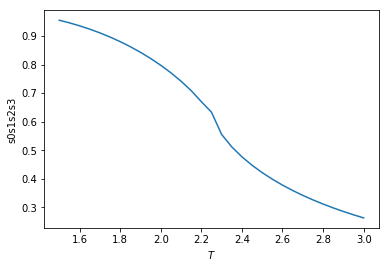

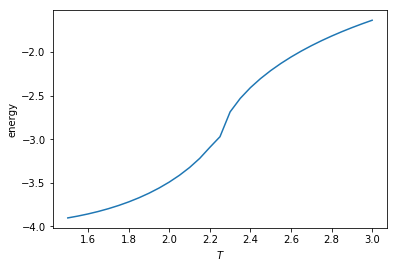

In [12]:
for i, label in enumerate(['s0s1s2s3', 'energy']):
    plt.figure()
    plt.plot(Ts, exp_vals_2D_ising[:, i])
    plt.xlabel("$T$")
    plt.ylabel(label)